In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/content/recruitment_data.csv')

In [3]:
df.head(10)

,Age,Gender,EducationLevel,ExperienceYears,PreviousCompanies,DistanceFromCompany,InterviewScore,SkillScore,PersonalityScore,RecruitmentStrategy,HiringDecision
0,26,1,2,0,3,26.783828,48,78,91,1,1
1,39,1,4,12,3,25.862694,35,68,80,2,1
2,48,0,2,3,2,9.920805,20,67,13,2,0
3,34,1,2,5,2,6.407751,36,27,70,3,0
4,30,0,1,6,1,43.105343,23,52,85,2,0
5,27,0,3,14,4,31.706659,54,50,50,1,1
6,48,0,2,6,1,17.291229,24,52,64,3,0
7,40,0,4,13,3,10.586811,6,3,92,3,0
8,26,1,3,6,5,28.774864,80,78,51,1,1
9,45,1,2,2,5,30.195964,92,16,94,3,0


In [4]:
df.shape

(1500, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  1500 non-null   int64  
 1   Gender               1500 non-null   int64  
 2   EducationLevel       1500 non-null   int64  
 3   ExperienceYears      1500 non-null   int64  
 4   PreviousCompanies    1500 non-null   int64  
 5   DistanceFromCompany  1500 non-null   float64
 6   InterviewScore       1500 non-null   int64  
 7   SkillScore           1500 non-null   int64  
 8   PersonalityScore     1500 non-null   int64  
 9   RecruitmentStrategy  1500 non-null   int64  
 10  HiringDecision       1500 non-null   int64  
dtypes: float64(1), int64(10)
memory usage: 129.0 KB


In [6]:
df['HiringDecision'].value_counts()

HiringDecision
0    1035
1     465
Name: count, dtype: int64

In [7]:
df.isnull().sum()

Age                    0
Gender                 0
EducationLevel         0
ExperienceYears        0
PreviousCompanies      0
DistanceFromCompany    0
InterviewScore         0
SkillScore             0
PersonalityScore       0
RecruitmentStrategy    0
HiringDecision         0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.describe()

,Age,Gender,EducationLevel,ExperienceYears,PreviousCompanies,DistanceFromCompany,InterviewScore,SkillScore,PersonalityScore,RecruitmentStrategy,HiringDecision
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.00000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,35.148667,0.492000,2.188000,7.694000,3.00200,25.505379,50.564000,51.116000,49.387333,1.893333,0.310000
std,9.252728,0.500103,0.862449,4.641414,1.41067,14.567151,28.626215,29.353563,29.353201,0.689642,0.462647
min,20.000000,0.000000,1.000000,0.000000,1.00000,1.031376,0.000000,0.000000,0.000000,1.000000,0.000000
25%,27.000000,0.000000,2.000000,4.000000,2.00000,12.838851,25.000000,25.750000,23.000000,1.000000,0.000000
50%,35.000000,0.000000,2.000000,8.000000,3.00000,25.502239,52.000000,53.000000,49.000000,2.000000,0.000000
75%,43.000000,1.000000,3.000000,12.000000,4.00000,37.737996,75.000000,76.000000,76.000000,2.000000,1.000000
max,50.000000,1.000000,4.000000,15.000000,5.00000,50.992462,100.000000,100.000000,100.000000,3.000000,1.000000


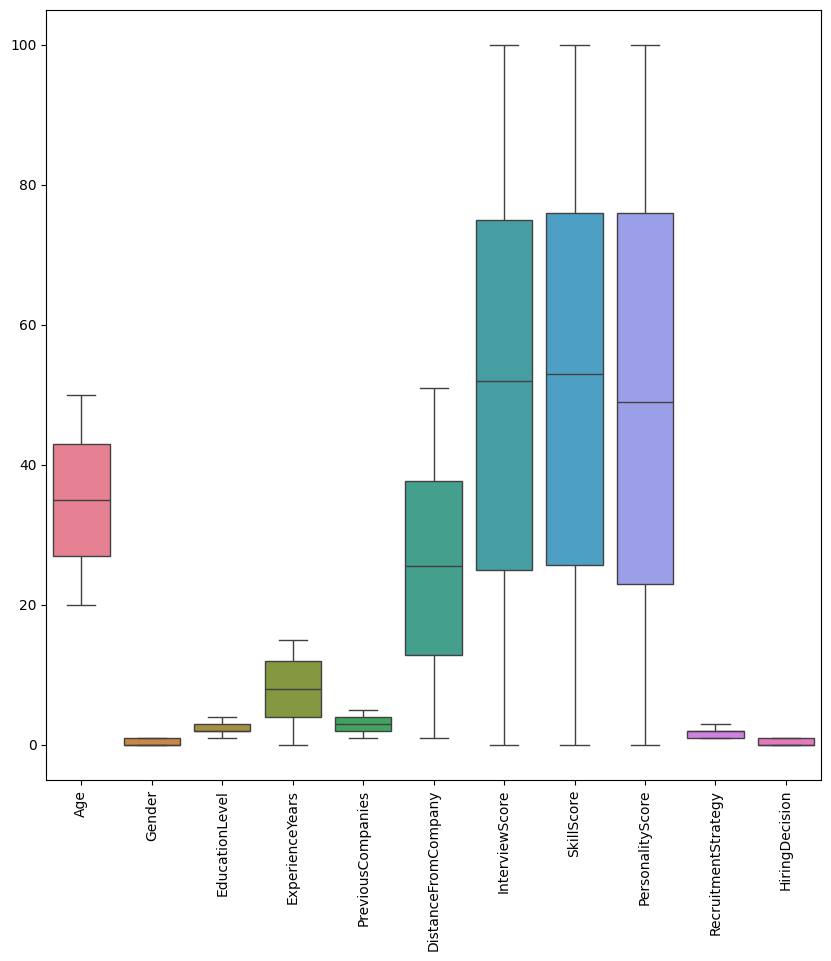

In [11]:
plt.figure(figsize=(10,10))
sns.boxplot(df)
plt.xticks(rotation=90)
plt.show()

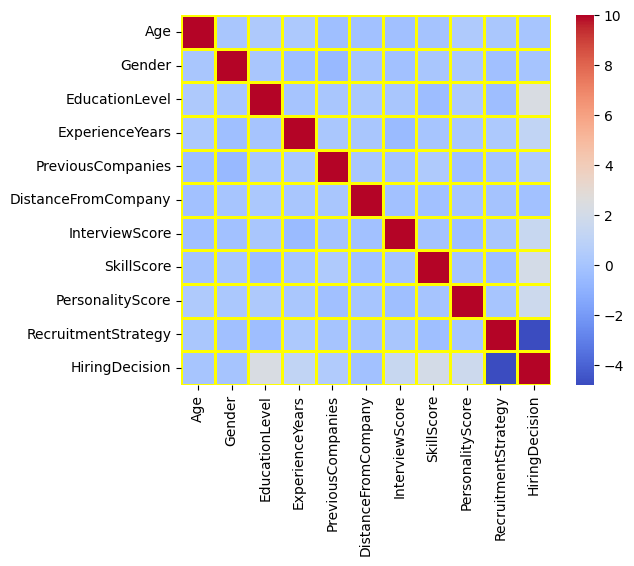

In [12]:
sns.heatmap(df.corr()*10,annot=False,cmap='coolwarm',square=True,linewidths=1,linecolor='yellow',cbar=True,fmt='.2f')
plt.show()

In [13]:
df.columns

Index(['Age', 'Gender', 'EducationLevel', 'ExperienceYears',
       'PreviousCompanies', 'DistanceFromCompany', 'InterviewScore',
       'SkillScore', 'PersonalityScore', 'RecruitmentStrategy',
       'HiringDecision'],
      dtype='object')

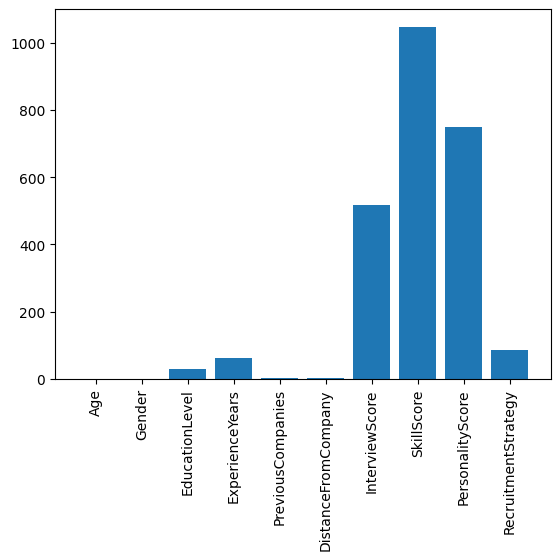

In [15]:
# prompt: code for selecting top features

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X = df.iloc[:, 0:10]  # Features
y = df.iloc[:, 10]  # Target

# configure to select all features
best_features = SelectKBest(score_func=chi2, k=10)

# learn relationship from training data
fit = best_features.fit(X, y)

# transform training and testing data
X_transformed = fit.transform(X)

# summarize scores
scores = fit.scores_

# summarize selected features
features = X.columns[fit.get_support()]

# plot scores
plt.bar(features, scores)
plt.xticks(rotation=90)
plt.show()


In [16]:
X.shape

(1500, 10)

In [17]:
y.shape

(1500,)

In [18]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss
smk = SMOTETomek(random_state=42)
X_res, y_res = smk.fit_resample(X, y)

In [19]:
X_res.shape

(1956, 10)

In [20]:
y_res.shape

(1956,)

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.25, random_state=42)

In [23]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [25]:
from sklearn.naive_bayes import BernoulliNB
classifier = BernoulliNB()
classifier.fit(X_train, y_train)

BernoulliNB()

In [26]:
y_pred = classifier.predict(X_test)

In [32]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [28]:
print(confusion_matrix(y_test, y_pred))

[[209  32]
 [ 53 195]]


In [30]:
print(accuracy_score(y_test, y_pred))

0.8261758691206544


In [33]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.87      0.83       241
           1       0.86      0.79      0.82       248

    accuracy                           0.83       489
   macro avg       0.83      0.83      0.83       489
weighted avg       0.83      0.83      0.83       489



In [34]:
from sklearn.svm import NuSVC
model = NuSVC()
model.fit(X_train, y_train)

NuSVC()

In [35]:
y_pred2 = model.predict(X_test)

In [36]:
print(confusion_matrix(y_test, y_pred2))

[[207  34]
 [ 46 202]]


In [37]:
print(accuracy_score(y_test, y_pred2))

0.83640081799591


In [38]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       241
           1       0.86      0.81      0.83       248

    accuracy                           0.84       489
   macro avg       0.84      0.84      0.84       489
weighted avg       0.84      0.84      0.84       489



In [39]:
# prompt: code for sdg classifier

from sklearn.linear_model import SGDClassifier
classifier = SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3, random_state=42, max_iter=5, tol=None)
classifier.fit(X_train, y_train)
y_pred3 = classifier.predict(X_test)



In [40]:
print(confusion_matrix(y_test, y_pred3))

[[192  49]
 [ 45 203]]


In [41]:

print(accuracy_score(y_test, y_pred3))

0.8077709611451943


In [42]:

print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.81      0.80      0.80       241
           1       0.81      0.82      0.81       248

    accuracy                           0.81       489
   macro avg       0.81      0.81      0.81       489
weighted avg       0.81      0.81      0.81       489



In [47]:
from sklearn.ensemble import GradientBoostingClassifier
model1 = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model1.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [48]:
y_pred4 = model1.predict(X_test)

In [49]:
print(confusion_matrix(y_test, y_pred4))

[[223  18]
 [ 24 224]]


In [50]:
print(accuracy_score(y_test, y_pred4))

0.9141104294478528


In [51]:
print(classification_report(y_test, y_pred4))

              precision    recall  f1-score   support

           0       0.90      0.93      0.91       241
           1       0.93      0.90      0.91       248

    accuracy                           0.91       489
   macro avg       0.91      0.91      0.91       489
weighted avg       0.91      0.91      0.91       489



In [52]:
from sklearn.linear_model import RidgeClassifier
model2 = RidgeClassifier(alpha=1, random_state=42)
model2.fit(X_train, y_train)

RidgeClassifier(alpha=1, random_state=42)

In [53]:
y_pred = model2.predict(X_test)


In [54]:
print(confusion_matrix(y_test, y_pred))

[[196  45]
 [ 43 205]]


In [55]:
print(accuracy_score(y_test, y_pred))

0.820040899795501


In [56]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.81      0.82       241
           1       0.82      0.83      0.82       248

    accuracy                           0.82       489
   macro avg       0.82      0.82      0.82       489
weighted avg       0.82      0.82      0.82       489



In [60]:
df['HiringDecision'].value_counts()

HiringDecision
0    1035
1     465
Name: count, dtype: int64

In [62]:
df.head()

,Age,Gender,EducationLevel,ExperienceYears,PreviousCompanies,DistanceFromCompany,InterviewScore,SkillScore,PersonalityScore,RecruitmentStrategy,HiringDecision
0,26,1,2,0,3,26.783828,48,78,91,1,1
1,39,1,4,12,3,25.862694,35,68,80,2,1
2,48,0,2,3,2,9.920805,20,67,13,2,0
3,34,1,2,5,2,6.407751,36,27,70,3,0
4,30,0,1,6,1,43.105343,23,52,85,2,0


In [63]:
input_data = (39,1,4,12,3,25.862694,35,68,80,2)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction = model2.predict(input_data_reshaped)
print(prediction)
if prediction[0] == 0:
  print('Not Hired')
else:
  print('Hired')

[1]
Hired


In [65]:
import pickle
pickle.dump(model2,open('model.pkl','wb'))

In [66]:
pickle.dump(sc,open('scaler.pkl','wb'))

In [67]:
pickle.dump(model1,open('model1.pkl','wb'))

In [68]:
pickle.dump(classifier,open('model2.pkl','wb'))